In [1]:
import pandas as pd
import numpy as np

In [2]:

import chardet
with open('spam.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result



{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [3]:
df=pd.read_csv('spam.csv',encoding='Windows-1252')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [7]:
df.rename({'v1':"target",'v2':'text'},inplace=True,axis=1)

In [8]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
#check for duplicate values


In [10]:
df.duplicated().sum()

403

In [11]:
df.shape

(5572, 2)

In [12]:
df=df.drop_duplicates(keep='first')

In [13]:
df.shape

(5169, 2)

In [14]:
#EDA

In [15]:
df['target']=df['target'].map({'ham':0,'spam':1})

<ipython-input-15-9f15e8bed0f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target']=df['target'].map({'ham':0,'spam':1})


In [16]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [17]:
len(df[df['target']==1])*100/len(df)

12.633004449603405

In [18]:
import matplotlib.pyplot as plt

In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

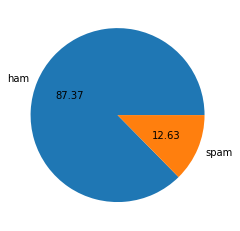

In [20]:
plt.pie(df['target'].value_counts(),labels=['ham',"spam"],autopct="%0.2f")
plt.show()

In [21]:
#Data is imbalanced

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Harsh
[nltk_data]     Soni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Harsh
[nltk_data]     Soni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters']=df['text'].apply(len)

<ipython-input-25-2d4713a058a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
#number of words
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

<ipython-input-27-1e79e18d0a88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentances']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

<ipython-input-29-1b05b97a02a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentances']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [30]:
df.head()

,target,text,num_characters,num_words,num_sentances
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentances']].describe()

,num_characters,num_words,num_sentances
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
df[df['target']==0][['num_characters','num_words','num_sentances']].describe()

,num_characters,num_words,num_sentances
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [33]:
df[df['target']==1][['num_characters','num_words','num_sentances']].describe()

,num_characters,num_words,num_sentances
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [34]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

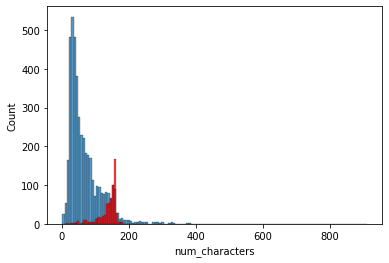

In [35]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

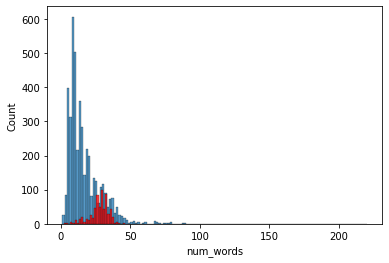

In [36]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

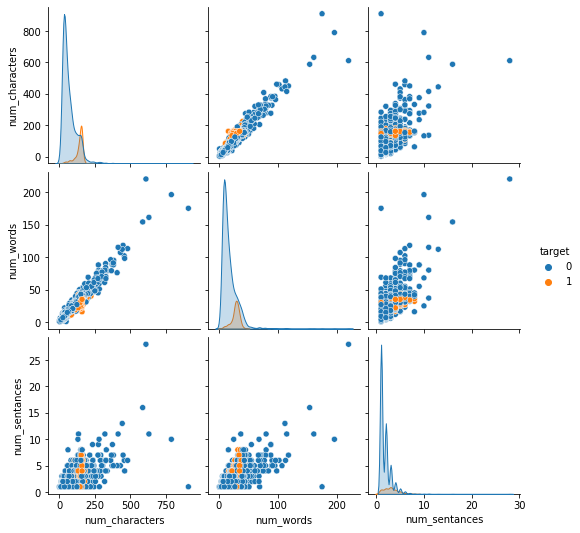

In [37]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

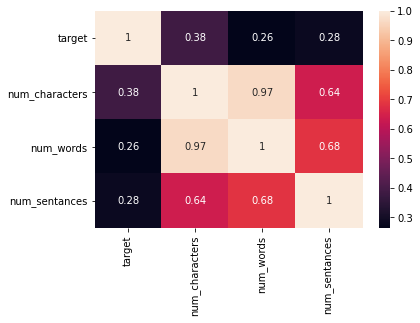

In [38]:
sns.heatmap(df.corr(),annot=True)

In [39]:
#Data Preprocessing

In [40]:
df.head()

,target,text,num_characters,num_words,num_sentances
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [41]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer


In [42]:
def transform_text(text):
    ps=PorterStemmer()
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y.copy()
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)


In [43]:
transform_text("I took the Ice Cream")

'took ice cream'

In [44]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
df['transform_text']=df['text'].apply(transform_text)

<ipython-input-45-524e99cd07c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transform_text']=df['text'].apply(transform_text)


In [46]:
df.head()

,target,text,num_characters,num_words,num_sentances,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


In [47]:
#Word Cloud
from wordcloud import WordCloud
wc=WordCloud(width=1000,height=1000,min_font_size=10,background_color='black')

In [48]:
spam_wc=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

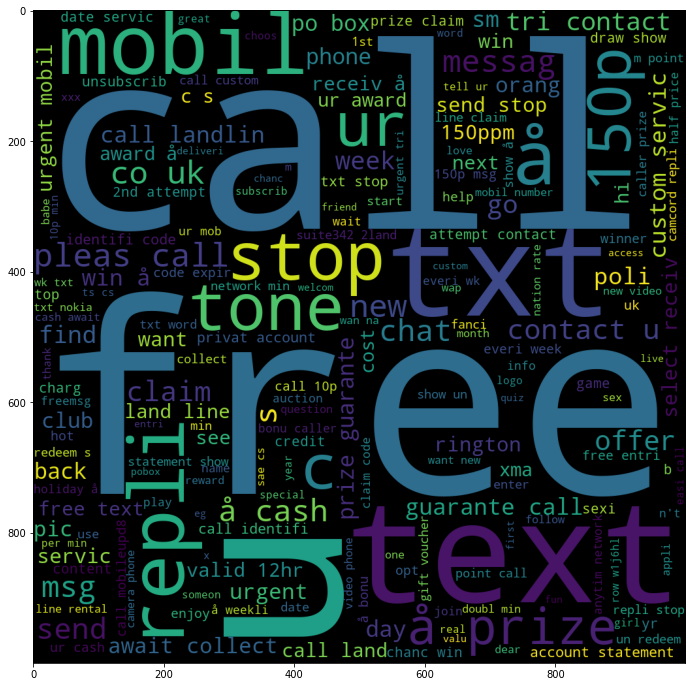

In [49]:
plt.figure(figsize=(12,12))
plt.imshow(spam_wc)

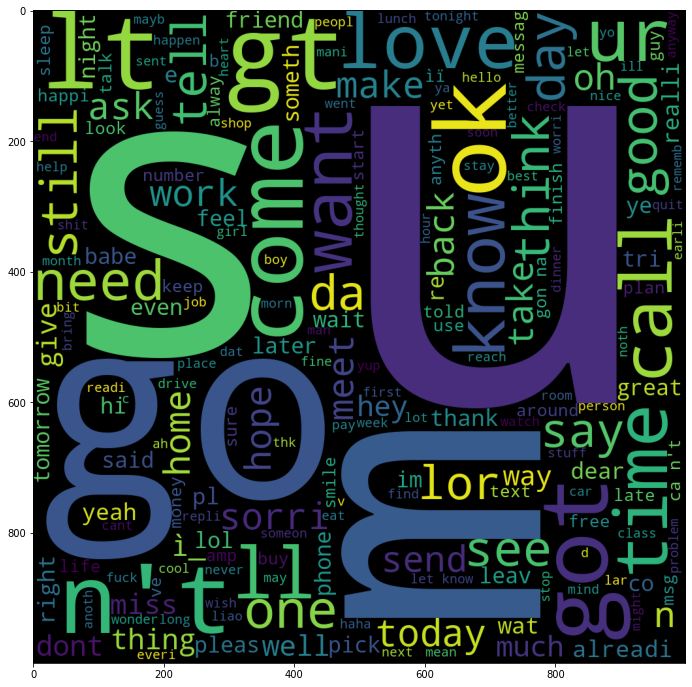

In [50]:
ham_wc=wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(12,12))
plt.imshow(ham_wc)

In [51]:
#top 50 words in HAM and SPAM

In [52]:
df['transform_text']

0       go jurong point crazi .. avail bugi n great wo...
1                           ok lar ... joke wif u oni ...
2       free entri 2 wkli comp win fa cup final tkt 21...
3             u dun say earli hor ... u c alreadi say ...
4                nah n't think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u. u å£750 pound prize ...
5568                             ì_ b go esplanad fr home
5569                                piti mood ... suggest
5570    guy bitch act like 'd interest buy someth els ...
5571                                       rofl true name
Name: transform_text, Length: 5169, dtype: object

In [53]:
spam_corpus=[]
for i in df[df['target']==1]['transform_text'].tolist():
    for word in i.split(' '):
        spam_corpus.append(word)

In [54]:
len(spam_corpus)

11083

In [55]:
from collections import Counter

c:\Users\Harsh Soni\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


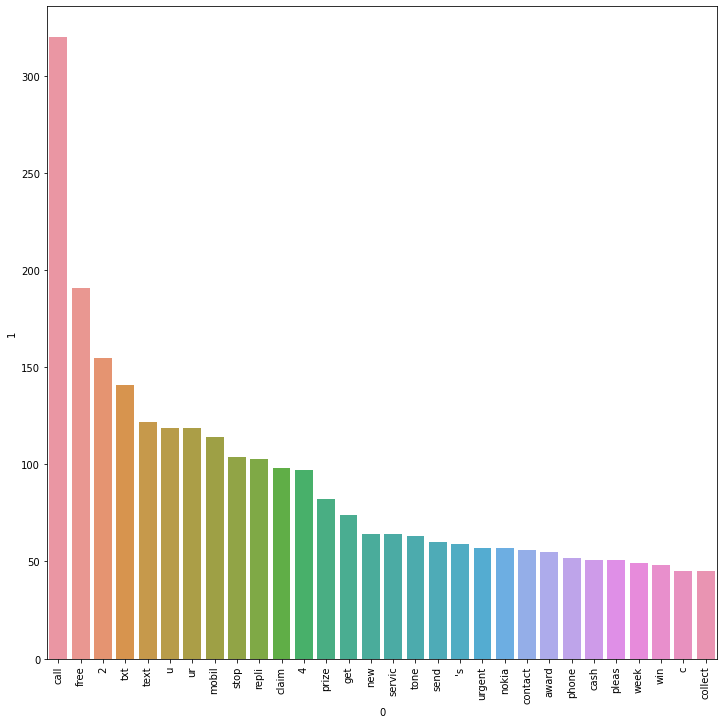

In [56]:
plt.figure(figsize=(12,12))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [57]:
ham_corpus=[]
for i in df[df['target']==0]['transform_text'].tolist():
    for word in i.split(' '):
        ham_corpus.append(word)

c:\Users\Harsh Soni\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


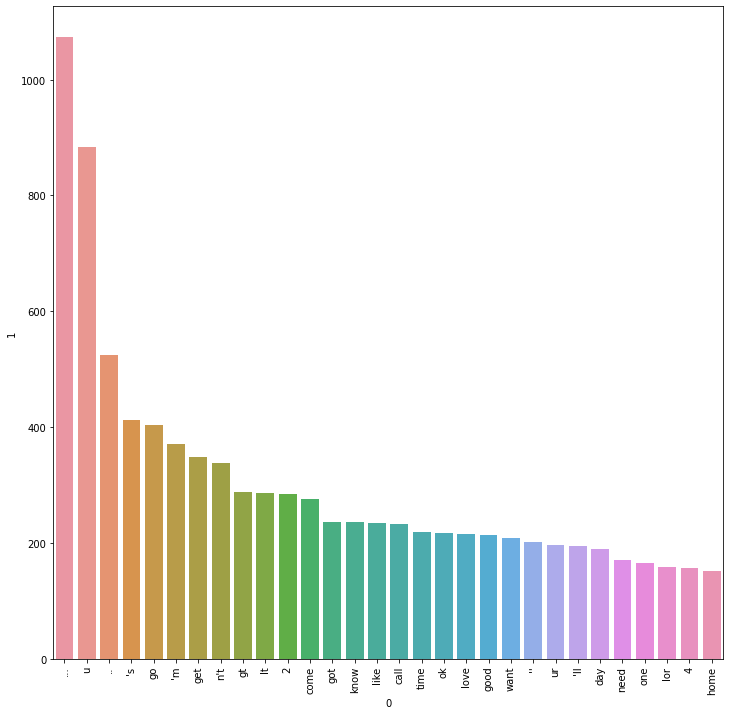

In [58]:
plt.figure(figsize=(12,12))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

Model Building

In [59]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [60]:
X=cv.fit_transform(df['transform_text']).toarray()

In [61]:
X.shape

(5169, 7380)

In [62]:
y=df['target'].values

In [63]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [66]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [67]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [68]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8987749838813669
[[1230  130]
 [  27  164]]
0.5578231292517006


In [69]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9774339136041263
[[1339   21]
 [  14  177]]
0.8939393939393939


In [70]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9742101869761445
[[1354    6]
 [  34  157]]
0.9631901840490797


In [103]:
#with tfidf

In [71]:
X=tfidf.fit_transform(df['transform_text']).toarray()
y=df['target'].values

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [73]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8646034816247582
[[1193  182]
 [  28  148]]
0.4484848484848485


In [74]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9722759509993553
[[1373    2]
 [  41  135]]
0.9854014598540146


In [75]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9825918762088974
[[1373    2]
 [  25  151]]
0.9869281045751634


In [81]:
#Choosen: TFIdf with bnb

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [81]:
svc = SVC()
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()
xgb = XGBClassifier()

In [84]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [85]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision



     


In [86]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC
Accuracy -  0.9742101869761445
Precision -  0.9927536231884058
For  KN
Accuracy -  0.9148936170212766
Precision -  1.0
For  NB
Accuracy -  0.9722759509993553
Precision -  0.9854014598540146
For  DT
Accuracy -  0.9645390070921985
Precision -  0.8379888268156425
For  LR
Accuracy -  0.9535783365570599
Precision -  0.9727272727272728
For  RF
Accuracy -  0.9787234042553191
Precision -  1.0
For  AdaBoost
Accuracy -  0.9690522243713733
Precision -  0.9266666666666666
For  BgC
Accuracy -  0.965183752417795
Precision -  0.88125
For  ETC
Accuracy -  0.9838813668600903
Precision -  0.9934640522875817
For  GBDT
Accuracy -  0.9671179883945842
Precision -  0.9844961240310077
For  xgb
Accuracy -  0.9748549323017408
Precision -  0.9659863945578231


In [87]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [88]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.914894,1.000000
5,RF,0.978723,1.000000
8,ETC,0.983881,0.993464
0,SVC,0.974210,0.992754
2,NB,0.972276,0.985401
9,GBDT,0.967118,0.984496
4,LR,0.953578,0.972727
10,xgb,0.974855,0.965986
6,AdaBoost,0.969052,0.926667
7,BgC,0.965184,0.881250


In [60]:
#model improvment

In [89]:
   #voting classifier

In [96]:
mnb=MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [97]:
from sklearn.ensemble import VotingClassifier

In [101]:
voting=VotingClassifier(estimators=[('rfc',rfc),('nb',mnb),('et',etc)],voting='soft')

In [102]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [104]:
y_pred=voting.predict(X_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


accuracy_score 0.9813023855577047
Precision 1.0


In [105]:
#stacking

In [107]:
estimetors=[('rfc',rfc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()


In [108]:
from sklearn.ensemble import StackingClassifier

In [109]:
clf=StackingClassifier(estimators=estimetors,final_estimator=final_estimator)

In [110]:
clf.fit(X_train,y_train)

StackingClassifier(estimators=[('rfc',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=2)),
                               ('nb', MultinomialNB()),
                               ('et',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [111]:
y_pred=clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9909735654416505
Precision 0.9664804469273743


In [89]:
import pickle

In [113]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))


In [114]:
mnb = MultinomialNB()


In [116]:

mnb.fit(X_train,y_train)

MultinomialNB()

In [118]:

y_pred=mnb.predict(X_test)
accuracy_score(y_test,y_pred)

0.9813023855577047

In [90]:
#ETC gives better accuracy among other algos, so we will go with ETC

In [91]:
etc=ExtraTreesClassifier()

In [92]:
etc.fit(X_train,y_train)

ExtraTreesClassifier()

In [93]:
pickle.dump(etc,open('model.pkl','wb'))

In [94]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))